# サポートベクターマシンの流れ
・サポートベクターマシンのメリット

①深層学習するほどデータ数がいらない

②データの次元が大きくなっても識別精度がいい

③いじるパラメータが少ない

・参考サイト
https://yolo.love/scikit-learn/iris/

# 1. データの読み込み
・ファイルの取り込みまたは、データのインポート

・データの確認

→アヤメデータ

→4つの特徴量・データ数と、3つのラベル・各ラベルのデータ数

In [1]:
#方法1:csvファイルをpandasで取り込む
import pandas as pd
iris_data = pd.read_csv("iris.csv", encoding="utf-8")
#方法2:scikit-learnからirisデータをインポート
#from sklearn.datasets import load_iris
#iris_dataset = load_iris()

#データを確認する
print("(アヤメのデータ数, 特徴量数とラベル数の合計) → ", iris_data.shape, "\n")
print("アヤメのラベルと、各ラベルのデータ数")
print(iris_data["Name"].value_counts())
iris_data.head()

(アヤメのデータ数, 特徴量数とラベル数の合計) →  (150, 5) 

アヤメのラベルと、各ラベルのデータ数
Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Name, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. データとラベルに分ける
・データをラベル(y)と入力データ(x)に分離する

In [2]:
#アヤメデータをラベル(y)と入力データ(x)に分離する
#y=Name列の全行を取得
#x=Name以外の列(特徴量)を全行取得
y = iris_data.loc[:, "Name"]
# -> y = iris_data.Name
x = iris_data.loc[:, ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
print("アヤメデータのラベルの一部と、特徴量\n")
print(y.head())
x.head()

アヤメデータのラベルの一部と、特徴量

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object


,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 3. 学習用とテスト用データに分ける
・xとyを学習用とテスト用に分ける

・train_test_splitの使い方

→1.戻り値は4つ(xの訓練データ、xのテストデータ、yの訓練データ、yのテストデータ、の順)

→2.引数は、①特徴量x、②ラベルy、③テストデータの割合(test_size=)、(④訓練データの割合(train_size=))、
   ⑤shuffle=true(デフォルト)のときデータを先頭から順番に分割する、
   ⑥random_state=シャッフルするときに、実行するごとにデータの並び順を変えるか(None)変えないか(1)
   
*テストデータの割合と訓練データの割合の合計が、100%を超える値を指定するとエラーとなる

In [3]:
from sklearn.model_selection import train_test_split
# xとyを学習用とテスト用に分離する
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, shuffle = True, random_state = 1)
print("(訓練データの特徴量のデータ数, 特徴量の数) → ", x_train.shape)
print("(テストデータの特徴量のデータ数, 特徴量の数) → ", x_test.shape, "\n")
print(y_train.head())
print("(訓練データのラベルのデータ数 → ", y_train.shape)
print(y_test.head())
print("(テストデータのラベルのデータ数 → ", y_test.shape)

(訓練データの特徴量のデータ数, 特徴量の数) →  (120, 4)
(テストデータの特徴量のデータ数, 特徴量の数) →  (30, 4) 

91     Iris-versicolor
135     Iris-virginica
69     Iris-versicolor
128     Iris-virginica
114     Iris-virginica
Name: Name, dtype: object
(訓練データのラベルのデータ数 →  (120,)
14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: Name, dtype: object
(テストデータのラベルのデータ数 →  (30,)


# 4. 学習させて評価する
・学習する

→ SVC().fit(特徴量(説明変数)の訓練データ, ラベルの訓練データ)

★SVC()の引数

①C=ソフトマージンの厳しさを表す(Cが大きいほど誤分類を許さない→大きすぎると過学習の原因、デフォルトは1)、②kernel=カーネル関数(線形カーネル，多項式カーネル，RBFカーネル，シグモイドカーネルなどがあるが，基本的にはRBFカーネルを使用)、③gamma=分類の決定境界を精度を決める(gammaが大きいほど決定境界は非線形になる)

・評価する

→ SVC().predict(特徴量(説明変数)のテストデータ)→ラベルの予測値が返される

→ accuracy_score(ラベルの訓練データ, ラベルの予測値)で予測値の正解率が出る

*正解率（accuracy）、適合率（precision）、再現率（recall）

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# 学習する(clfはclassificationの略語)
clf = SVC(gamma = "auto")
clf.fit(x_train, y_train)
# 評価する
y_pred = clf.predict(x_test)
print("正解率 → ", accuracy_score(y_test, y_pred))

正解率 →  0.9666666666666667


# (おまけ)グリッドサーチ→より正解率の高くなるパラメータを探索
①param_gridで指定した全てのハイパーパラメータの組み合わせでモデルを作成

②訓練データの一部を使って交差検証とグリッドサーチを実行

③正解率が最も高い時のハイパーパラメータを採用

In [5]:
from sklearn.model_selection import GridSearchCV

#★パラメータを dict 型で指定
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100],  'gamma' : [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]}

# validation setはGridSearchCVが自動で作成してくれるため，訓練データとテストデータの分割のみを実行すればよい
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

grid_search = GridSearchCV(SVC(), param_grid, cv=10, iid=True)
# GridSearchCVは、訓練データの一部のデータを交差検証とグリッドサーチに使用→訓練データが少なくなるとcv(交差検証の回数)は少なく設定
# fit 関数を呼ぶことで交差検証とグリッドサーチがどちらも実行される
grid_search.fit(x_train, y_train)

print('Test set score: {}'.format(grid_search.score(x_test, y_test)))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation: {}'.format(grid_search.best_score_))

Test set score: 1.0
Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation: 0.9809523809523809


# テストデータの分類結果を考察
* 混合行列の使用
* 以下の3つをを一目で理解
1. #### 正解率（accuracy）…全テストデータの中で、誤分類なく正しく予測できた割合
2. #### 再現率（recall）…テストデータが0であるときに、実際にモデルで0と予測する確率(混合行列の行で考える)
3. #### 適合率（precision）…モデルで0と予測した時に、そのテストデータが本当に0である確率(混合行列の列で考える)

SVMでのアヤメの分類結果の混合行列(各行名・列名はラベル)


Text(91.68, 0.5, 'actual value')

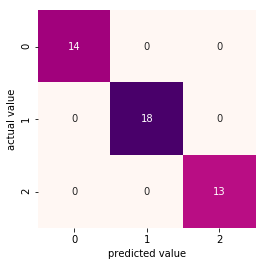

In [6]:
#混合行列の作成(正解値(y_test)と予測値(y_pred_tree)の用意)
#→テストデータからモデルの再現性などを見る
%matplotlib inline
from sklearn.metrics import precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("SVMでのアヤメの分類結果の混合行列(各行名・列名はラベル)")
y_pred_SVM = grid_search.predict(x_test)
mat_SVM = confusion_matrix(y_test, y_pred_SVM)
sns.heatmap(mat_SVM, square=True, annot=True, cbar=False, fmt="d", cmap="RdPu")
plt.xlabel("predicted value")
plt.ylabel("actual value")